In [1]:
import pandas as pd
from env import host, username, password


In [2]:
def get_zillow_data():
    """
    This function connects to the zillow database and retrieves data from the properties_2017 table for
    all 'Single Family Residential' properties. The resulting DataFrame contains the bedroomcnt, bathroomcnt,
    calculatedfinishedsquarefeet, taxvaluedollarcnt, yearbuilt, taxamount, and fips columns and is returned by
    the function.
    """
   
    # create the connection url
    url = f'mysql+pymysql://{username}:{password}@{host}/zillow'

    # read the SQL query into a DataFrame
    query = '''
            SELECT bedroomcnt, bathroomcnt, calculatedfinishedsquarefeet, taxvaluedollarcnt, yearbuilt, taxamount, fips
            FROM properties_2017
            WHERE propertylandusetypeid = 261
            '''
    df = pd.read_sql(query, url)

    return df

In [4]:
get_zillow_data().head()

,bedroomcnt,bathroomcnt,calculatedfinishedsquarefeet,taxvaluedollarcnt,yearbuilt,taxamount,fips
0,0.0,0.0,NaN,27516.0,NaN,NaN,6037.0
1,0.0,0.0,NaN,10.0,NaN,NaN,6037.0
2,0.0,0.0,NaN,10.0,NaN,NaN,6037.0
3,0.0,0.0,NaN,2108.0,NaN,174.21,6037.0
4,4.0,2.0,3633.0,296425.0,2005.0,6941.39,6037.0


In [5]:
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [14]:
df = get_zillow_data()

In [15]:
df.describe()

,bedroomcnt,bathroomcnt,calculatedfinishedsquarefeet,taxvaluedollarcnt,yearbuilt,taxamount,fips
count,2.152852e+06,2.152852e+06,2.144379e+06,2.152370e+06,2.143526e+06,2.148421e+06,2.152863e+06
mean,3.287196e+00,2.230688e+00,1.862855e+03,4.618962e+05,1.960950e+03,5.634866e+03,6.048377e+03
std,9.547544e-01,9.992796e-01,1.222125e+03,6.996760e+05,2.216220e+01,8.178910e+03,2.043329e+01
min,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.801000e+03,1.850000e+00,6.037000e+03
25%,3.000000e+00,2.000000e+00,1.257000e+03,1.881702e+05,1.949000e+03,2.534980e+03,6.037000e+03
50%,3.000000e+00,2.000000e+00,1.623000e+03,3.276710e+05,1.958000e+03,4.108950e+03,6.037000e+03
75%,4.000000e+00,3.000000e+00,2.208000e+03,5.345270e+05,1.976000e+03,6.414320e+03,6.059000e+03
max,2.500000e+01,3.200000e+01,9.525760e+05,9.842891e+07,2.016000e+03,1.337756e+06,6.111000e+03


In [16]:
df.shape

(2152863, 7)

In [17]:

from sklearn.preprocessing import StandardScaler

def prep_zillow(df):
    """
    This function takes in the Zillow DataFrame and does the following:
    - Drops any rows with missing values
    - Scales the numerical columns using StandardScaler
    - Returns the cleaned and scaled DataFrame
    """
    
    # Drop any rows with missing values
    df.dropna(inplace=True)
    
    # Separate the numerical columns from the categorical columns
    num_cols = ['bedroomcnt', 'bathroomcnt', 'calculatedfinishedsquarefeet', 'taxvaluedollarcnt', 'yearbuilt', 'taxamount']
    cat_cols = ['fips']
    num_df = df[num_cols]
    cat_df = df[cat_cols]
    
    # Scale the numerical columns using StandardScaler
    scaler = StandardScaler()
    num_df_scaled = pd.DataFrame(scaler.fit_transform(num_df), columns=num_cols, index=num_df.index)
    
    # Combine the scaled numerical columns and categorical columns
    cleaned_df = pd.concat([num_df_scaled, cat_df], axis=1)
    
    # Return the cleaned and scaled DataFrame
    return cleaned_df


In [19]:
df_prep = prep_zillow(df)

In [20]:
df_prep.head()

,bedroomcnt,bathroomcnt,calculatedfinishedsquarefeet,taxvaluedollarcnt,yearbuilt,taxamount,fips
4,0.749068,-0.242646,1.448578,-0.242509,1.987871,0.169514,6037.0
6,-0.323203,1.776437,-0.199053,0.571696,2.258745,0.592257,6037.0
7,-0.323203,-0.242646,0.174999,0.274852,-1.578630,0.295342,6037.0
11,-3.540018,-2.261729,-0.542821,-0.672390,0.498067,-0.707028,6037.0
14,-3.540018,-2.261729,-1.385053,-0.670039,0.543212,-0.686096,6037.0


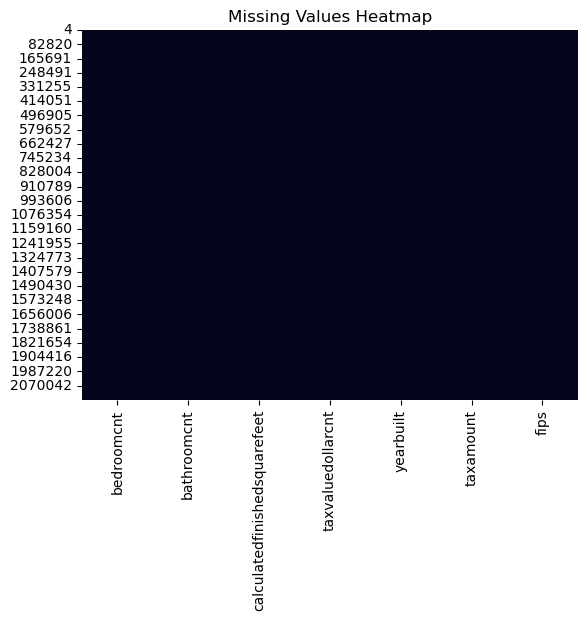

Missing Value Counts:
 bedroomcnt                      0
bathroomcnt                     0
calculatedfinishedsquarefeet    0
taxvaluedollarcnt               0
yearbuilt                       0
taxamount                       0
fips                            0
dtype: int64


In [21]:
# vizualizing nulls and leftover trash values
import seaborn as sns
import matplotlib.pyplot as plt

# Plot a heatmap of missing values
sns.heatmap(df_prep.isnull(), cbar=False)
plt.title("Missing Values Heatmap")
plt.show()

# Count the missing values in each column
null_counts = df_prep.isnull().sum()
print("Missing Value Counts:\n", null_counts)


In [25]:
def wrangle_zillow():
    """
    This function retrieves data from the Zillow database, prepares the data by dropping missing values and scaling
    the numerical columns using StandardScaler, and returns the cleaned and scaled DataFrame.
    """
    
    # Get the Zillow data
    df = get_zillow_data()
    
    # Prepare the Zillow data
    df_prep = prep_zillow(df)
    
    # Return the cleaned and scaled DataFrame
    return df_prep

In [26]:
df = wrangle_zillow()

In [27]:
df.head()

,bedroomcnt,bathroomcnt,calculatedfinishedsquarefeet,taxvaluedollarcnt,yearbuilt,taxamount,fips
4,0.749068,-0.242646,1.448578,-0.242509,1.987871,0.169514,6037.0
6,-0.323203,1.776437,-0.199053,0.571696,2.258745,0.592257,6037.0
7,-0.323203,-0.242646,0.174999,0.274852,-1.578630,0.295342,6037.0
11,-3.540018,-2.261729,-0.542821,-0.672390,0.498067,-0.707028,6037.0
14,-3.540018,-2.261729,-1.385053,-0.670039,0.543212,-0.686096,6037.0


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2140235 entries, 4 to 2152862
Data columns (total 7 columns):
 #   Column                        Dtype  
---  ------                        -----  
 0   bedroomcnt                    float64
 1   bathroomcnt                   float64
 2   calculatedfinishedsquarefeet  float64
 3   taxvaluedollarcnt             float64
 4   yearbuilt                     float64
 5   taxamount                     float64
 6   fips                          float64
dtypes: float64(7)
memory usage: 130.6 MB


In [29]:
df.describe()

,bedroomcnt,bathroomcnt,calculatedfinishedsquarefeet,taxvaluedollarcnt,yearbuilt,taxamount,fips
count,2.140235e+06,2.140235e+06,2.140235e+06,2.140235e+06,2.140235e+06,2.140235e+06,2.140235e+06
mean,-1.092908e-15,-5.623453e-15,7.156124e-17,-2.710068e-17,-4.524172e-15,8.528222e-17,6.048310e+03
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,2.034491e+01
min,-3.540018e+00,-2.261729e+00,-1.524197e+00,-6.802253e-01,-7.221829e+00,-7.179381e-01,6.037000e+03
25%,-3.232033e-01,-2.426458e-01,-4.953485e-01,-4.009047e-01,-5.402819e-01,-3.936064e-01,6.037000e+03
50%,-3.232033e-01,-2.426458e-01,-1.965977e-01,-1.954429e-01,-1.339716e-01,-1.926201e-01,6.037000e+03
75%,7.490683e-01,7.668957e-01,2.822222e-01,1.092277e-01,6.786491e-01,1.017611e-01,6.059000e+03
max,2.326677e+01,3.004360e+01,7.781541e+02,1.325066e+02,2.484473e+00,1.372419e+02,6.111000e+03


In [31]:
df.shape

(2140235, 7)

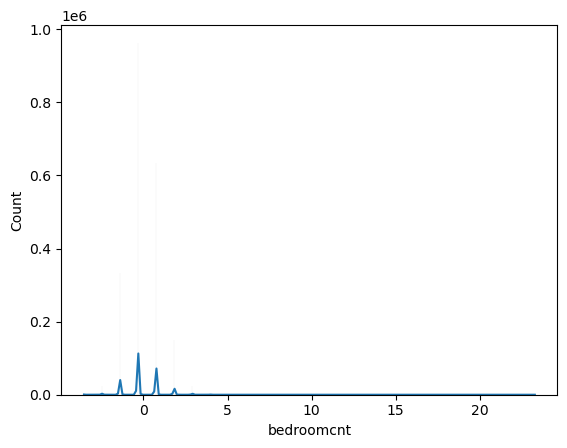

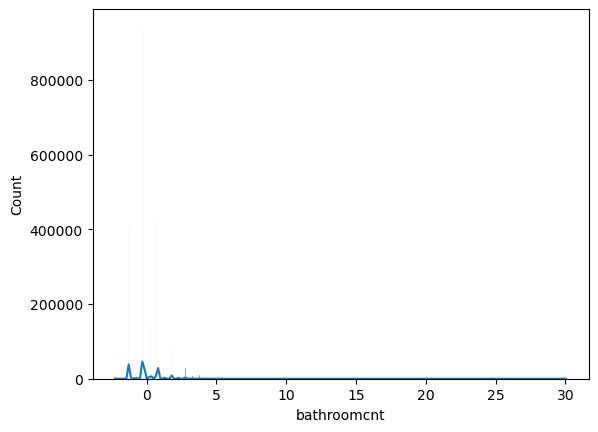

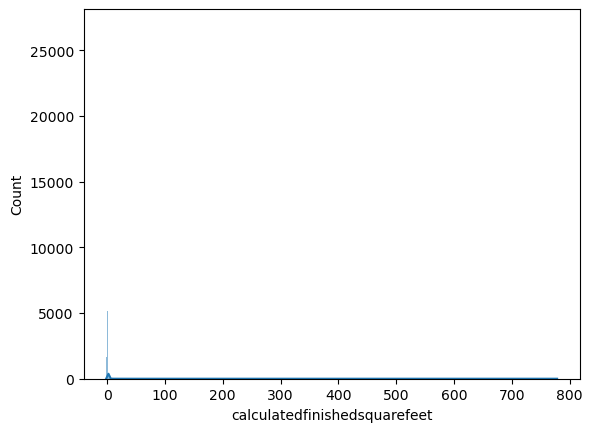

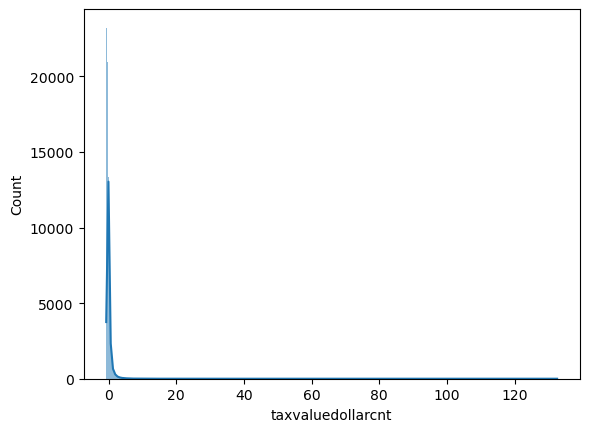

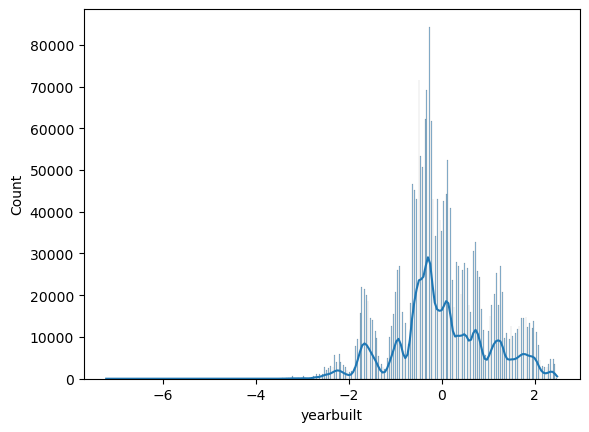

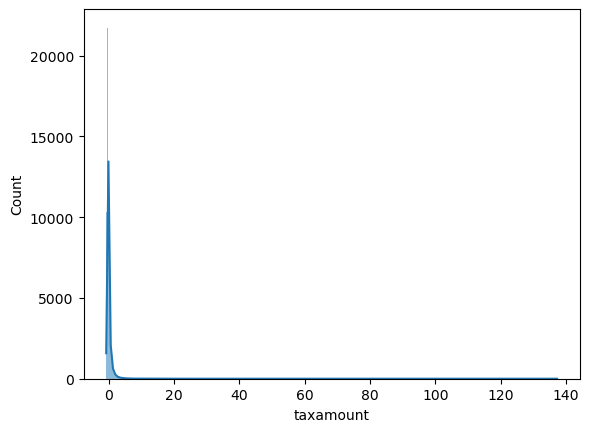

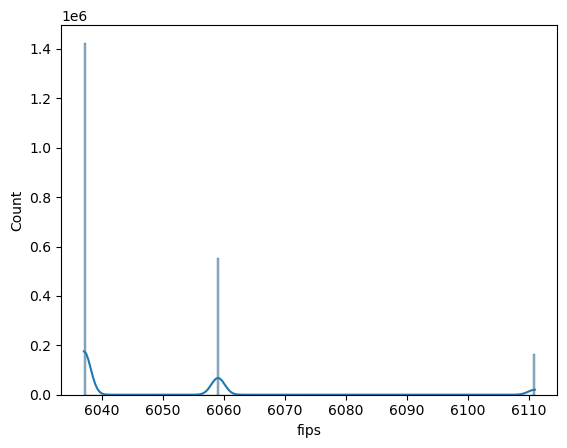

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns

# create histograms for each column
for col in df.columns:
    sns.histplot(data=df, x=col, kde=True)
    plt.show()
